### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 3


### Дисциплина: Методы машинного обучения

##### Студент:  Пономарева Л. М.
##### Группа:   НПИбд-02-19

### Москва 2022
***

### Вариант 27 

1. Набор данных: diamonds 

2. Независимая переменная: features/x 

3. Зависимая переменная: price 

4. Доп. признак: имеющий минимальную ковариацию с независимой переменной 

5. Визуализация доп. признака – диаграмма размаха 

6. Показатель качества регрессии – R^2 (коэффициент детерминации) 

7. Степень полинома: 5 

8. Параметры глубокой нейронной сети: кол-во скрытых слоев – 5, кол-во нейронов в скрытом слое – 32, функция активации – гиперболический тангенс. 


### Задание 1
Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets, включая указанные в задании независимый признак и зависимый признак (отклик).

Набор данных: diamonds  
Независимый признак: features/x  
Зависимый признак: price

Активируем последние версии наборов данных и подключаем модуль Tensorflow Datasets, который содержит необходимый нам набор 'diamonds':

In [1]:
!pip install -q tfds-nightly
import tensorflow_datasets as tfds

Подключим необходимые библиотеки

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds

Считываем из TFDS набор данных diamonds и преобразуем датасет в датафрейм:

In [3]:
ds = tfds.load('diamonds', split='train')
df = tfds.as_dataframe(ds)
df.head()

,features/carat,features/clarity,features/color,features/cut,features/depth,features/table,features/x,features/y,features/z,price
0,1.26,2,4,2,60.599998,60.0,6.97,7.00,4.23,6546.0
1,0.80,3,4,4,62.099998,54.0,5.96,5.99,3.71,3030.0
2,0.56,4,2,4,61.700001,54.0,5.28,5.32,3.27,1915.0
3,1.51,3,6,1,64.000000,58.0,7.24,7.27,4.64,6936.0
4,0.33,6,5,4,62.200001,54.0,4.43,4.45,2.76,646.0


Вытащим данные о параметрах features/x и price:

In [4]:
x1 = df['features/x'].to_numpy()
y1 = df['price'].to_numpy()
x1.shape, y1.shape

((53940,), (53940,))

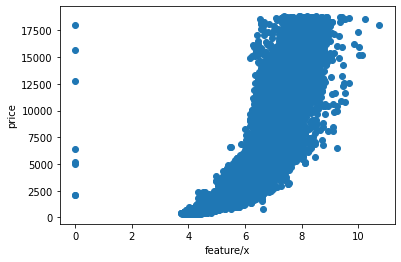

In [5]:
plt.scatter(x1, y1)
plt.xlabel("feature/x")
plt.ylabel("price");

Очистим набор от точек, расположенных вдоль левой границы графика.

In [6]:
min = np.min(x1)
y = y1[x1 > 0]
x = x1[x1 > 0]
x.shape, y.shape

((53932,), (53932,))

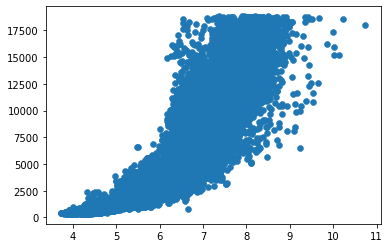

In [7]:
plt.scatter(x, y, label='диаграмма рассеяния', linewidths=0.5);

### Задание 2
Решите задачу полиномиальной регрессии для степени полинома, указанной в индивидуальном задании, при помощи нейронной сети с одним нейроном и оцените качество полученной модели по показателю, указанному в индивидуальном задании.

Степень полинома: 5  
Показатель качества регрессии: R<sup>2</sup> (коэффициент детерминации)


In [8]:
X = x.reshape(-1, 1)  # матрица с одним столбцом 
X.shape

(53932, 1)

Подготовим для модели регрессии входные данные с пятью признаками - линейной, квадратичной, и т.д. до степенной зависимости порядка 5:

In [9]:
X5 = np.hstack([X, np.power(X, 2), np.power(X, 3), np.power(X, 4), np.power(X, 5)])
X5.shape

(53932, 5)

Создадим простейшую нейронную сеть с одним слоем из одного нейрона:

In [10]:
reg_model = tf.keras.Sequential([
    tf.keras.Input(shape=(5,)),
    tf.keras.layers.Dense(units=1)
])

In [11]:
reg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


Скомпилируем модель

In [12]:
reg_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.00001),
    loss='mae')

Обучаем нейронную сеть на полиномиальных зависимостях:

In [13]:
history = reg_model.fit(
    X5, y, 
    epochs=50,
    # уровень выводимой информации
    verbose=1,
    # проверка (валидация) на 20% обучающих данных
    validation_split = 0.2)

Epoch 1/50
1349/1349 [==============================] - 3s 2ms/step - loss: 2901.2825 - val_loss: 2857.3206
Epoch 2/50
1349/1349 [==============================] - 4s 3ms/step - loss: 2762.7788 - val_loss: 2719.0640
Epoch 3/50
1349/1349 [==============================] - 4s 3ms/step - loss: 2624.5432 - val_loss: 2581.0183
Epoch 4/50
1349/1349 [==============================] - 5s 3ms/step - loss: 2487.1108 - val_loss: 2444.0068
Epoch 5/50
1349/1349 [==============================] - 4s 3ms/step - loss: 2350.4692 - val_loss: 2307.2810
Epoch 6/50
1349/1349 [==============================] - 2s 1ms/step - loss: 2214.7461 - val_loss: 2171.8533
Epoch 7/50
1349/1349 [==============================] - 2s 2ms/step - loss: 2080.1687 - val_loss: 2037.1389
Epoch 8/50
1349/1349 [==============================] - 2s 1ms/step - loss: 1947.0778 - val_loss: 1904.1240
Epoch 9/50
1349/1349 [==============================] - 2s 1ms/step - loss: 1815.5720 - val_loss: 1771.8110
Epoch 10/50
1349/1349 [=====

In [14]:
y_predict_reg = reg_model.predict(X5)

Вычислим среднюю квадратичную ошибку MSE:

In [15]:
y_predict_reg_ = y_predict_reg.reshape(-1)

In [16]:
mse = np.sum((y_predict_reg_ - y)**2) / len(y)
print("MSE = ", mse)

MSE =  2653160.8360157236


Вычислим коэффициент детерминации R<sup>2</sup>:

In [17]:
R = 1 - mse/np.var(y)
print("R^2  = ", R)

R^2  =  0.8332363902766227


### Задание 3
Постройте кривые обучения с зависимостью от количества эпох.

Визуализируем историю обучения при помощи следующей функции:

In [18]:
def plot_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.ylim([0, max(history.history['loss'])])
  plt.title('Функция потерь при обучении модели')
  plt.xlabel('Эпохи обучения')
  plt.ylabel('Функция потерь')
  plt.legend(['Обучающая выборка', 'Тестовая выборка'], loc='upper right')
  plt.grid(True)

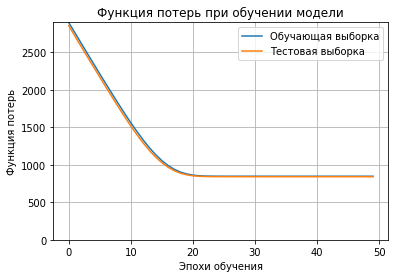

In [19]:
plot_loss(history)

### Задание 4
Визуализируйте точки набора данных на плоскости в виде диаграммы рассеяния (ось X – независимый признак, ось Y – зависимый признак), а также линию регрессии (другим цветом), подписывая оси и рисунок.  

Выполним прогноз:

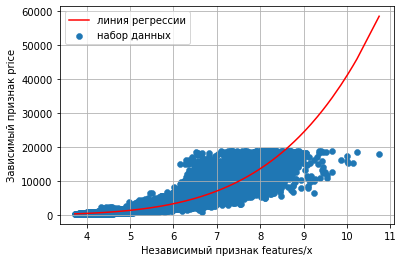

In [20]:
plt.scatter(x, y, label='набор данных', linewidths=0.5)
plt.plot(np.sort(x), y_predict_reg[np.argsort(x)], color='r', label='линия регрессии')
plt.xlabel('Независимый признак features/x')
plt.ylabel('Зависимый признак price')
plt.legend()
plt.grid();

### Задание 5
Определите в исходном наборе данных признак (отличный от независимого и зависимого признаков), принимающий непрерывные значения и имеющий свойства, указанные в индивидуальном задании.  

Признак: имеющий минимальную ковариацию с независимой переменной.

Вычислим матрицу ковариаций:

In [21]:
c = df.cov()
c

,features/carat,features/clarity,features/color,features/cut,features/depth,features/table,features/x,features/y,features/z,price
features/carat,0.224687,-0.275484,0.234998,-0.071435,0.019167,0.192365,0.518484,0.515248,0.318917,1.742765e+03
features/clarity,-0.275484,2.713057,0.071818,0.347929,-0.159009,-0.590085,-0.687339,-0.674277,-0.426538,-9.646453e+02
features/color,0.234998,0.071818,2.893757,-0.038974,0.115221,0.100597,0.515770,0.512116,0.321998,1.170738e+03
features/cut,-0.071435,0.347929,-0.038974,1.246795,-0.348815,-1.081358,-0.157278,-0.154901,-0.117664,-2.382799e+02
features/depth,0.019167,-0.159009,0.115221,-0.348815,2.052404,-0.946840,-0.040641,-0.048009,0.095968,-6.085373e+01
features/table,0.192365,-0.590085,0.100597,-1.081358,-0.946840,4.992948,0.489643,0.468972,0.237996,1.133318e+03
features/x,0.518484,-0.687339,0.515770,-0.157278,-0.040641,0.489643,1.258347,1.248789,0.768487,3.958021e+03
features/y,0.515248,-0.674277,0.512116,-0.154901,-0.048009,0.468972,1.248789,1.304472,0.767320,3.943271e+03
features/z,0.318917,-0.426538,0.321998,-0.117664,0.095968,0.237996,0.768487,0.767320,0.498011,2.424713e+03
price,1742.765358,-964.645300,1170.737650,-238.279928,-60.853732,1133.318065,3958.021484,3943.270809,2424.712609,1.591563e+07


Найдем в ней минимальное значение и определим положение этого значения в матрице:

In [22]:
array = c.to_numpy()
min = 10000000000
length = len(array)
for i in range(length-1):
  if (array[i][6] < min):
      min = array[i][6]   
np.where(array == min)

(array([1, 6]), array([6, 1]))

Это признак features/clarity, который оказался дискретным, так что найдем подходящий вручную:

features/depth - это признак с минимальным значением ковариации с независимой переменной среди признаков с непрерывными значениями.

### Задание 6
Визуализируйте этот признак в соответствии с индивидуальным заданием.

Визуализация доп. признака – диаграмма размаха

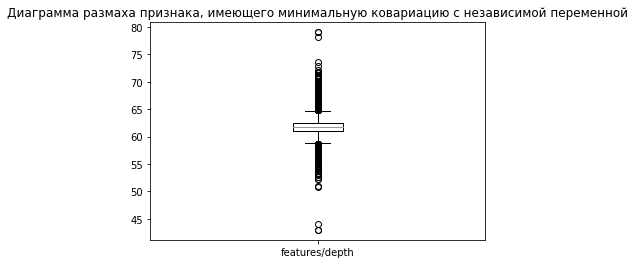

In [23]:
plt.boxplot(df['features/depth'])
plt.title("Диаграмма размаха признака, имеющего минимальную ковариацию с независимой переменной")
plt.xticks([1], ['features/depth']);

### Задание 7
Сформируйте набор входных из двух признаков набора данных (независимый признак и определенный признак), создайте и адаптируйте нормализующий слой Tensorflow для двух признаков. 

Сформируем набор входных данных из двух признаков:

In [64]:
X2 = np.array(df[['features/x','features/depth']])  # набор из независимого и определенного признака
y2 = np.array(df[['price']]).reshape(-1)  # зависимый признак
X2.shape, y2.shape

((53940, 2), (53940,))

Адаптируем нормализующий слой Tensorflow для двух признаков:

In [65]:
feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(2,)) 
feature_normalizer.adapt(X2)

### Задание 8
Используя созданный нормализующий слой, постройте нейронную сеть (нелинейный регресор) с количеством скрытых слоев, количеством нейронов и функцией активации, указанными в индивидуальном задании, и одним нейроном в выходном слое и обучите ее на наборе данных из двух признаков и отклика. 

Кол-во скрытых слоев – 5, кол-во нейронов в скрытом слое – 32, функция активации – гиперболический тангенс.

In [66]:
large_model = tf.keras.Sequential([
    feature_normalizer,
    tf.keras.layers.Dense(units=32, activation='tanh'),
    tf.keras.layers.Dense(units=32, activation='tanh'),
    tf.keras.layers.Dense(units=32, activation='tanh'),
    tf.keras.layers.Dense(units=32, activation='tanh'),
    tf.keras.layers.Dense(units=32, activation='tanh'),
    tf.keras.layers.Dense(units=1)
])

large_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 2)                3         
 ion)                                                            
                                                                 
 dense_13 (Dense)            (None, 32)                96        
                                                                 
 dense_14 (Dense)            (None, 32)                1056      
                                                                 
 dense_15 (Dense)            (None, 32)                1056      
                                                                 
 dense_16 (Dense)            (None, 32)                1056      
                                                                 
 dense_17 (Dense)            (None, 32)                1056      
                                                      

Скомпилируем модель, используя в качестве функции потерь  среднеквадратичную ошибку MSE с оптимизатором по умолчанию (RmsProp):

In [67]:
large_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss='mae')

Обучим модель

In [87]:
history2 = large_model.fit(
    X2, y2, 
    epochs=50,
    # уровень выводимой информации
    verbose=1,
    # проверка (валидация) на 20% обучающих данных
    validation_split = 0.2)

Epoch 1/50
1349/1349 [==============================] - 3s 2ms/step - loss: 20091206.0000 - val_loss: 20486726.0000
Epoch 2/50
1349/1349 [==============================] - 2s 2ms/step - loss: 19920744.0000 - val_loss: 20315684.0000
Epoch 3/50
1349/1349 [==============================] - 3s 2ms/step - loss: 19752440.0000 - val_loss: 20148322.0000
Epoch 4/50
1349/1349 [==============================] - 2s 2ms/step - loss: 19589814.0000 - val_loss: 19984342.0000
Epoch 5/50
1349/1349 [==============================] - 3s 2ms/step - loss: 19429578.0000 - val_loss: 19824682.0000
Epoch 6/50
1349/1349 [==============================] - 5s 4ms/step - loss: 19273262.0000 - val_loss: 19668150.0000
Epoch 7/50
1349/1349 [==============================] - 3s 2ms/step - loss: 19121382.0000 - val_loss: 19516202.0000
Epoch 8/50
1349/1349 [==============================] - 3s 2ms/step - loss: 18973186.0000 - val_loss: 19368356.0000
Epoch 9/50
1349/1349 [==============================] - 3s 2ms/step - lo

### Задание 9
Визуализируйте набор данных в виде точечного графика и прогноз нейронной сети в виде поверхности в трехмерном пространстве.

Для построения 3d графиков импортируем необходимые модули:

In [69]:
from mpl_toolkits import mplot3d

Подготовим координаты точек набора данных:

In [70]:
xs = X2[:,0] # features/x
ys = X2[:,1] # features/depth
zs = y2      # price

Подготовим данные:

In [71]:
n_plot = 51 # оптимальное количество точек для визуализации

x_plot = np.linspace(np.min(xs), np.max(xs), n_plot) 
y_plot = np.linspace(np.min(ys), np.max(ys), n_plot)

x_mesh, y_mesh = np.meshgrid(x_plot, y_plot)
x_mesh.shape, y_mesh.shape

((51, 51), (51, 51))

In [72]:
x_plot2 = np.reshape(x_mesh, [n_plot**2,1])
y_plot2 = np.reshape(y_mesh, [n_plot**2,1])
xy_2 = np.hstack([x_plot2, y_plot2])
xy_2.shape

(2601, 2)

Теперь выполним прогнозирование при помощи обученной ранее модели:
видим, что прогнозирование не работает, как должно

In [91]:
z = large_model.predict(xy_2)
z.shape

(2601, 1)

Вернемся к форме 51 на 51:

In [89]:
z_mesh = z.reshape((n_plot, n_plot))
z_mesh.shape

(51, 51)

Визуализируем 

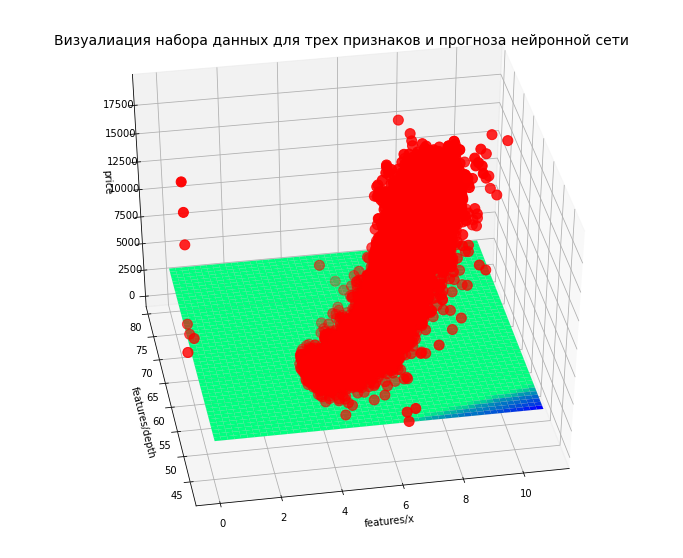

In [92]:
from matplotlib import cm

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(x_mesh, y_mesh, z_mesh, rstride=1, cstride=1, linewidth=0.05, cmap=cm.winter, antialiased=True, edgecolors='gray') 
ax.scatter( xs, ys, zs, s=100, c='r' )

ax.set_xlabel('features/x') 
ax.set_ylabel('features/depth') 
ax.set_zlabel('price') 
ax.set_title('Визуалиация набора данных для трех признаков и прогноза нейронной сети', fontsize=14)

ax.view_init(elev = 40, azim = -100)

### Задание 10
Разбейте набор данных из двух признаков и отклика на обучающую и тестовую выборки и постройте кривые обучения для заданного показателя качества в зависимости от количества точек в обучающей выборке, подписывая оси и рисунок и создавая легенду. 

Используем функцию train_test_split для разделения набора данных:

In [77]:
def train_test_split(X, y, test_ratio=0.2, seed=None):
    """возвращает X_train, X_test, y_train, y_test"""
    assert X.shape[0] == y.shape[0], \
        "Размер X должен быть равен размеру y"
    assert 0.0 <= test_ratio <= 1.0, \
        "Неверное значение test_ratio"

    if seed:
        np.random.seed(seed)

    shuffled_indexes = np.random.permutation(len(X))

    test_size = int(len(X) * test_ratio)
    test_indexes = shuffled_indexes[:test_size]
    train_indexes = shuffled_indexes[test_size:]

    X_train = X[train_indexes]
    y_train = y[train_indexes]

    X_test = X[test_indexes]
    y_test = y[test_indexes]

    return X_train, X_test, y_train, y_test

Разобьем массивы данных X и y на обучающие и тестовые данные:

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, 0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37758, 2), (16182, 2), (37758,), (16182,))

Функция высчитывающая показатель качества R<sup>2</sup>

In [93]:
def my_r(y_test, y_predict):
  mse = np.sum((y_predict - y_test)**2) / len(y_test)
  return 1 - mse/np.var(y_test)

In [94]:
train_score = []
test_score = []
for i in range(1758, 37758, 1000):
    large_model = tf.keras.Sequential([
        feature_normalizer,
        tf.keras.layers.Dense(units=32, activation='tanh'),
        tf.keras.layers.Dense(units=1)
    ])
    large_model.compile(loss='mse')
    large_model.fit(X_train[:i], y_train[:i], epochs=50, verbose=0)

    y_train_predict = large_model.predict(X_train[:i])
    train_score.append(my_r(y_train[:i], y_train_predict))
    
    y_test_predict = large_model.predict(X_test)
    test_score.append(my_r(y_test, y_test_predict))
    print('-->', i, ' done')

--> 1758  done
--> 2758  done
--> 3758  done
--> 4758  done
--> 5758  done
--> 6758  done
--> 7758  done
--> 8758  done
--> 9758  done
--> 10758  done
--> 11758  done
--> 12758  done
--> 13758  done
--> 14758  done
--> 15758  done
--> 16758  done
--> 17758  done
--> 18758  done
--> 19758  done
--> 20758  done
--> 21758  done
--> 22758  done
--> 23758  done
--> 24758  done
--> 25758  done
--> 26758  done
--> 27758  done
--> 28758  done
--> 29758  done
--> 30758  done
--> 31758  done
--> 32758  done
--> 33758  done
--> 34758  done
--> 35758  done
--> 36758  done


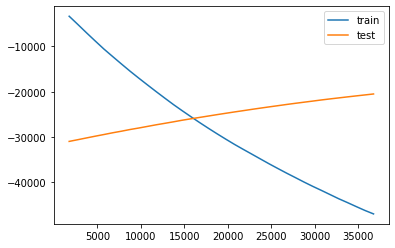

In [95]:
plt.plot([i for i in range(1758, len(X_train), 1000)], 
                               train_score, label="train")
plt.plot([i for i in range(1758, len(X_train), 1000)], 
                               test_score, label="test")
plt.legend();